# Analyzing Portfolio Risk and Return

In [1]:
# Imported required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


In [4]:
# Imported data by reading in the CSV file and setting the DatetimeIndex 
whale_df = pd.read_csv(Path('Resources/whale_navs.csv'),
                       index_col='date', parse_dates=True,
                       infer_datetime_format=True)

# Reviewing first 5 rows of the DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [5]:
# Converted the dataframe of NAVs and prices into daily returns
# Dropped rows with all missing values
whale_daily = whale_df.pct_change().dropna()

# Reviewing first 5 rows of the daily returns DataFrame.
whale_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

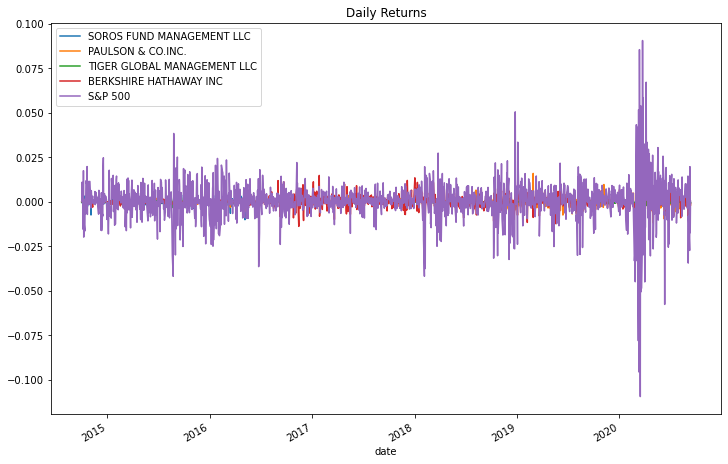

In [6]:
# Plotted daily return data of the 4 funds and the S&P 500 
whale_daily.plot(figsize=(12,8), title="Daily Returns")


In [7]:
# Calculated the cumulative returns of the 4 fund portfolios and the S&P 500
whale_cumulative = (1 + whale_daily).cumprod()

# Reviewing last 5 rows of the cumulative returns DataFrame
whale_cumulative.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

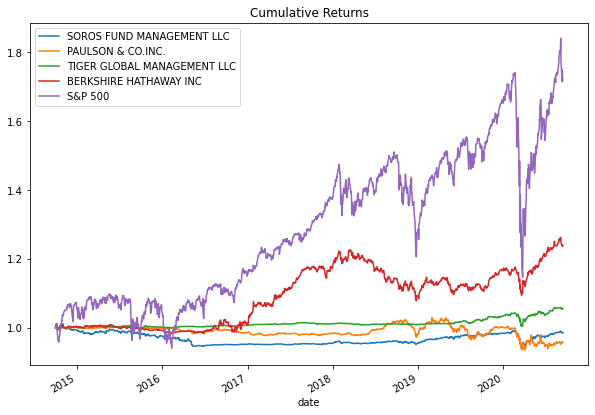

In [10]:
# Plotted the cumulative returns
whale_cumulative.plot(figsize=(10,7),title='Cumulative Returns')

### Cumulative Return Analysis: 
* Though there are moments at the end of 2015 and again in early 2016 where the S&P 500 dips below all four fund portfolios; the S&P 500 outperforms all of the funds from end of Q1 2016 through 2020.

---

<AxesSubplot:title={'center':'Daily Return Volatility'}>

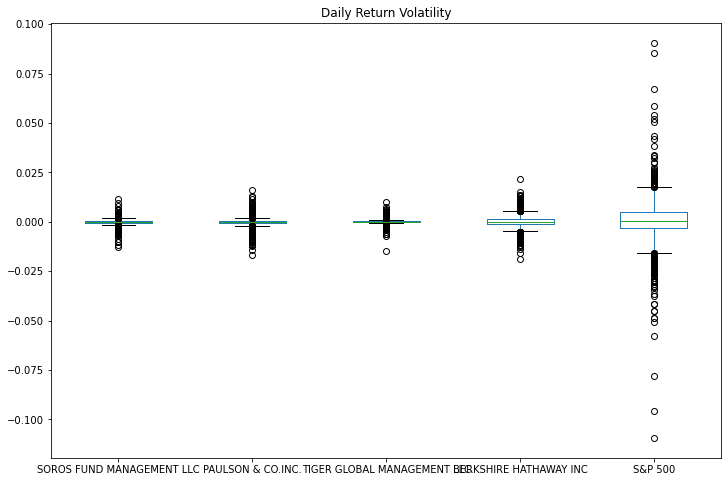

In [12]:
# Created box plots to visualize the daily return volatility of the 4 funds and the S&P 500 
whale_daily.plot.box(figsize=(12,8), title='Daily Return Volatility')


<AxesSubplot:title={'center':'Daily Returns - Soros, Paulson, Tiger, Berkshire'}>

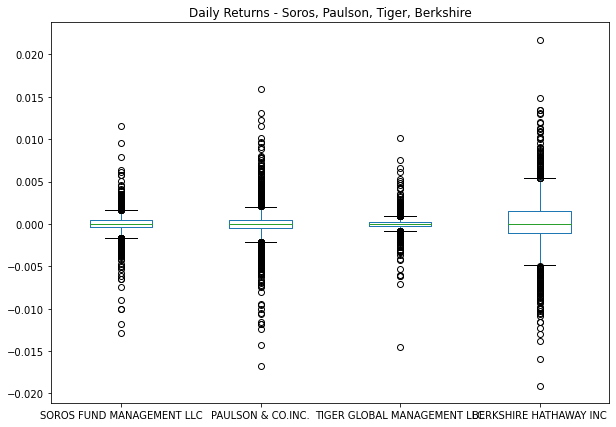

In [13]:
# Created a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500
fund_daily = whale_daily.drop(['S&P 500'], axis=1)

# Created box plots to reflect the return data for only the 4 fund portfolios
fund_daily.plot.box(figsize=(10,7), title='Daily Returns - Soros, Paulson, Tiger, Berkshire')

### Box Plot Volatility Analysis:
* Berkshire Hathaway was the fund that was the most volatile (has the greatest spread), while Tiger Global was the fund that was the least volatile (has the smallest spread).

---

In [14]:
# Calculated the standard deviation for all 4 portfolios and the S&P 500
whale_std = whale_daily.std()

# Sorted the standard deviation from smallest to largest
whale_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [15]:
# Calculated the annualized standard deviation of the 4 portfolios and the S&P 500
annualized_std = whale_daily.std() * np.sqrt(252)

# Sorted the annual standard deviations from smallest to largest
annualized_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Whale 21 Day Standard Deviation '}, xlabel='date'>

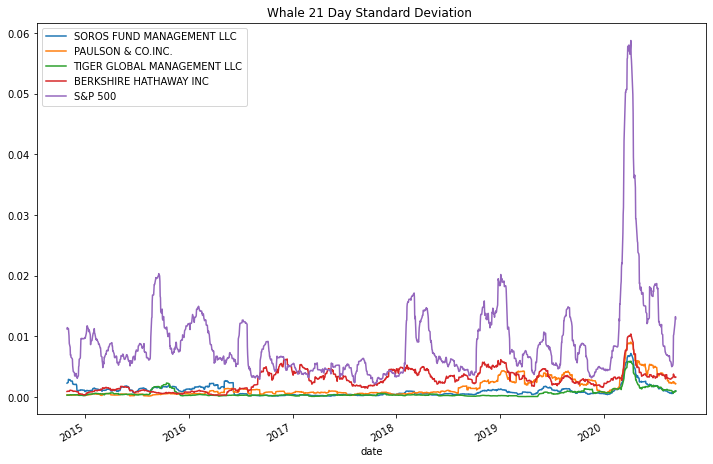

In [16]:
# Used the daily returns DataFrame to get the standard deviation for a 21-day rolling window
whale_std_21 = whale_daily.rolling(window=21).std()

# Plotted the rolling standard deviation of the 4 portfolios and the S&P 500
whale_std_21.plot(figsize=(12,8), title="Whale 21 Day Standard Deviation ")

<AxesSubplot:title={'center':'Fund Portfolio 21 Day Standard Deviation'}, xlabel='date'>

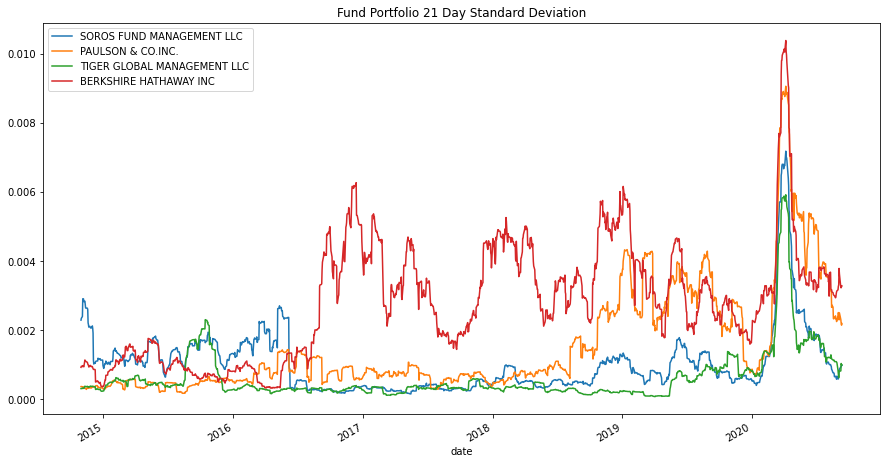

In [17]:
# Used the daily return data to get the 21-day rolling standard deviation of just the 4 portfolios
fund_std_21 = fund_daily.rolling(window=21).std()

# Plotted the 21-day rolling standard deviation for just the 4 portfolios
fund_std_21.plot(figsize=(15,8), title='Fund Portfolio 21 Day Standard Deviation')

#### Standard Deviation Risk Analysis:
* Based on the annualized standard deviation no other portfolio posed more risk than the S&P 500.

* Based on the 21-Day rolling metrics, by the end of 2016 and through to 2020 Berkshire Hathaway's risk becomes more correlated to the risk of the S&P 500. It isnt until 2019 when the other portfolios start to have a stronge correlation to the S&P 500's risk increases.

* Based on the 21-Day rolling standard deviations of the four fund portfolios, Berkshire Hathaway posed the most risk. There were moments in 2015 and through half of 2016 where Soros Fund Management, and for a brief time Tiger Global Management, posed the most risk. Similarly there where moments between 2019 and 2020 where Paulson&Co posed the most risk.

---

In [18]:
# Used 252 as the number of trading days in the year
trading_days = 252

# Calculated the annual average return data for the 4 fund portfolios and the S&P 500
annual_avg_return = whale_daily.mean() * trading_days

# Sorted the annual average returns from lowest to highest
annual_avg_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [19]:
# Calculated the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
whale_sharpe_ratio = annual_avg_return / annualized_std

# Sorted the Sharpe Ratios from lowest to highest
whale_sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio - Soros, Paulson, Tiger, Berkshire, S&P'}>

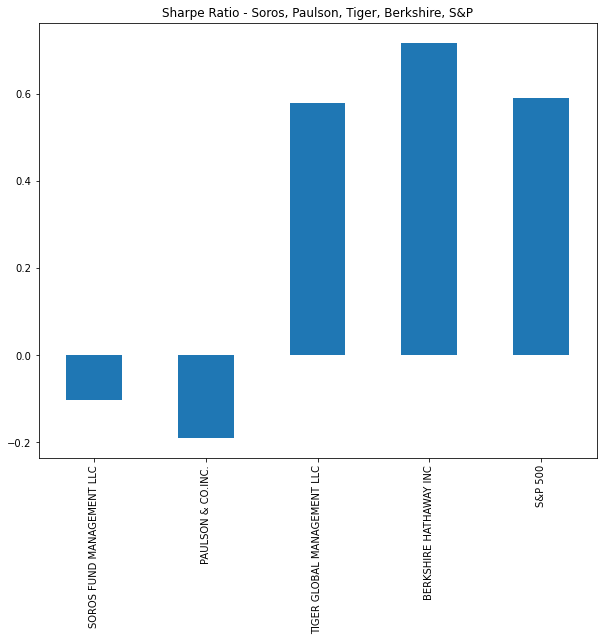

In [20]:
# Plotted the Sharpe ratios as a bar chart
whale_sharpe_ratio.plot.bar(figsize=(10,8), title='Sharpe Ratio - Soros, Paulson, Tiger, Berkshire, S&P')

### Risk-Return Profile Analysis:

* The analysis shows that Berkshire Hathaway offers the best risk-return, while Paulson&Co offers the worst.

---

In [21]:
# Calculated the variance of the S&P 500 using a rolling 60-day window.
sp500_60_variance = whale_daily['S&P 500'].rolling(window=60).var()

# Reviewing the last 5 row of the 60-Day rolling variance
sp500_60_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [22]:
# Calculated Berkshire's covariance using a 60-day rolling window 
berk_60_covariance = whale_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whale_daily['S&P 500'])

# Reviewing the last five rows of the 60-Day rolling covariance
berk_60_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [23]:
# Calculated Berkshire's beta based on the 60-day rolling covariance compared to the market (S&P 500)
berk_60_beta = berk_60_covariance / sp500_60_variance

# Reviewing the last 5 rows of the 60-Day rolling beta
berk_60_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [26]:
# Calculated Berkshire's average of the 60-day rolling beta
berk_60_beta.mean()


0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway INC - 60 Day Rolling Beta'}, xlabel='date'>

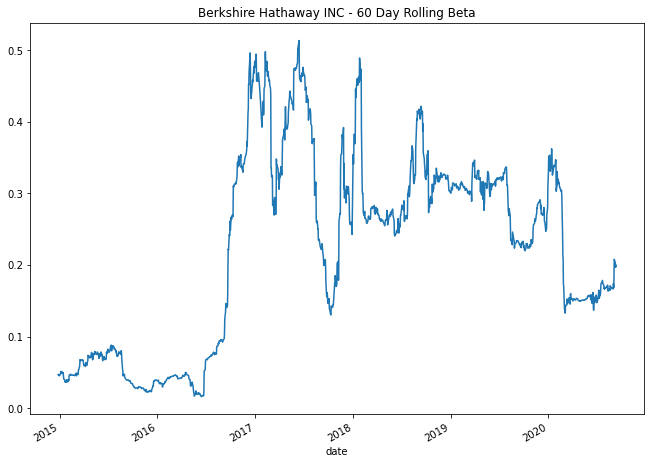

In [27]:
# Plotted Berkshire's rolling beta 
berk_60_beta.plot(figsize=(11,8), title='Berkshire Hathaway INC - 60 Day Rolling Beta')


In [28]:
# Calculated Tiger's covariance using a 60-day rolling window 
tiger_60_covariance = whale_daily['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(whale_daily['S&P 500'])

# Reviewing the last 5 rows of the covariance data
tiger_60_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [29]:
# Calculate Tiger's beta based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_60_beta = tiger_60_covariance / sp500_60_variance

# Reviewing the last 5 rows of the beta information
tiger_60_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [30]:
# Calculated Tiger's average of the 60-day rolling beta
tiger_60_beta.mean()


0.03093001487238774

<AxesSubplot:title={'center':'Tiger Global Management LLC - 60 Day Rolling Beta'}, xlabel='date'>

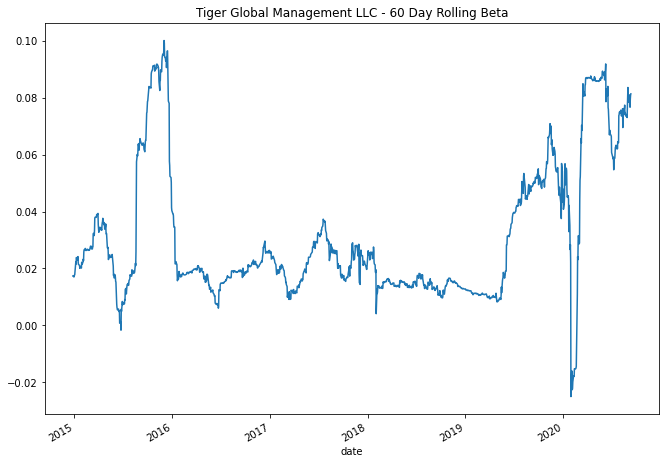

In [31]:
# Plotted Tiger's rolling beta 
tiger_60_beta.plot(figsize=(11,8), title='Tiger Global Management LLC - 60 Day Rolling Beta')


### Rolling Beta Analysis:

* Berkshire Hathaway seems to be more sensitive to S&P 500 movements.

* Based on the final beta analysis, I would recommend Berkshire Hathaway Inc for inclusion into my firm's suite of fund offerings.

---